In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/Recommender System End-to-End"

Books.csv  books_dataset.csv  Ratings.csv  ratings_dataset.csv	Users.csv  users_dataset.csv


In [4]:
books_df = pd.read_csv("/content/drive/My Drive/Recommender System End-to-End/Books.csv")
books_df.head()

<ipython-input-4-b2b20a50d7b5>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("/content/drive/My Drive/Recommender System End-to-End/Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
books_df = books_df.rename(columns={'ISBN':'isbn',
                         'Book-Title':'book_title',
                         'Book-Author':'book_author',
                         'Year-Of-Publication':'year_of_pub',
                         'Publisher':'publisher',
                         'Image-URL-S':'image_url_small',
                         'Image-URL-M':'image_url_med',
                         'Image-URL-L':'image_url_large',
                         })

In [7]:
books_df.head(5)

,isbn,book_title,book_author,year_of_pub,publisher,image_url_small,image_url_med,image_url_large
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
len(books_df['isbn'].unique())

271360

In [9]:
len(books_df['publisher'].unique())

16808

In [10]:
books_df['year_of_pub'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [11]:
#Since the data is only jumbled between the columns, could be an entry problem, no need to replace with Nulls
# books_df['year_of_pub'] = books_df['year_of_pub'].replace(['DK Publishing Inc','Gallimard'],np.NaN)
# books_df = books_df.fillna(0)

In [12]:
pd.set_option('display.width', None)

In [13]:
filtered_df = books_df[books_df['year_of_pub'] == 'DK Publishing Inc']

In [14]:
books_df.loc[books_df.year_of_pub=='DK Publishing Inc']

,isbn,book_title,book_author,year_of_pub,publisher,image_url_small,image_url_med,image_url_large
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [15]:
books_df.loc[books_df.isbn == '078946697X','book_author'] = 'Michael Teeitelbaum'
books_df.loc[books_df.isbn == '078946697X','year_of_pub'] = '2000'
books_df.loc[books_df.isbn == '078946697X','publisher'] = 'DK Publishing Inc'
books_df.loc[books_df.isbn == '078946697X','book_title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [16]:
books_df.loc[books_df.isbn == '0789466953','book_author'] = 'James Buckley'
books_df.loc[books_df.isbn == '0789466953','year_of_pub'] = '2000'
books_df.loc[books_df.isbn == '0789466953','publisher'] = 'DK Publishing Inc'
books_df.loc[books_df.isbn == '0789466953','book_title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

In [17]:
books_df.loc[books_df.year_of_pub=='DK Publishing Inc']

,isbn,book_title,book_author,year_of_pub,publisher,image_url_small,image_url_med,image_url_large


In [18]:
books_df.loc[books_df.year_of_pub=='Gallimard']

,isbn,book_title,book_author,year_of_pub,publisher,image_url_small,image_url_med,image_url_large
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [19]:
books_df.loc[books_df.isbn == '2070426769','book_author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books_df.loc[books_df.isbn == '2070426769','year_of_pub'] = '2003'
books_df.loc[books_df.isbn == '2070426769','publisher'] = 'Gallimard'
books_df.loc[books_df.isbn == '2070426769','book_title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [20]:
books_df['year_of_pub'] = books_df['year_of_pub'].astype(int)

<Axes: xlabel='year_of_pub', ylabel='Count'>

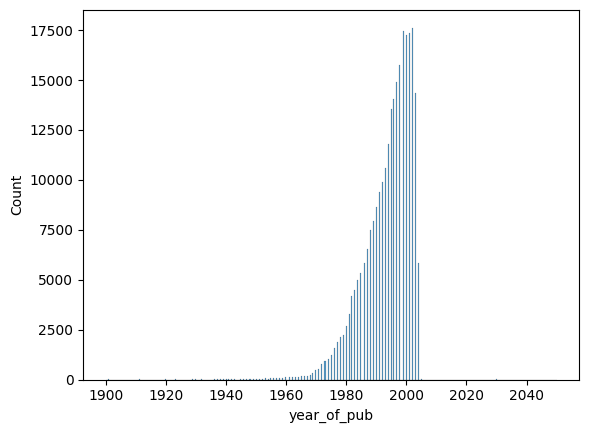

In [21]:
sns.histplot(books_df,x='year_of_pub',binrange=(1900,2050))

In [22]:
books_df.head()

,isbn,book_title,book_author,year_of_pub,publisher,image_url_small,image_url_med,image_url_large
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [23]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   isbn             271360 non-null  object
 1   book_title       271360 non-null  object
 2   book_author      271359 non-null  object
 3   year_of_pub      271360 non-null  int64 
 4   publisher        271358 non-null  object
 5   image_url_small  271360 non-null  object
 6   image_url_med    271360 non-null  object
 7   image_url_large  271357 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [24]:
print(sorted(books_df['year_of_pub'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [25]:
books_df.loc[(books_df.year_of_pub==0) | (books_df.year_of_pub > 2006),'year_of_pub'] = np.NaN

In [26]:
books_df['year_of_pub'].fillna(round(books_df.year_of_pub.mean()),inplace=True)

In [27]:
books_df.year_of_pub.isnull().sum()

0

In [28]:
# now we can see that there are no books in the records with year_of_pub as Nulls

In [29]:
df = books_df

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   isbn             271360 non-null  object 
 1   book_title       271360 non-null  object 
 2   book_author      271359 non-null  object 
 3   year_of_pub      271360 non-null  float64
 4   publisher        271358 non-null  object 
 5   image_url_small  271360 non-null  object 
 6   image_url_med    271360 non-null  object 
 7   image_url_large  271357 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


In [31]:
df.loc[df.publisher.isnull(),:]

,isbn,book_title,book_author,year_of_pub,publisher,image_url_small,image_url_med,image_url_large
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [32]:
df.loc[df.book_title=='Tyrant Moon',:]

,isbn,book_title,book_author,year_of_pub,publisher,image_url_small,image_url_med,image_url_large
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...


In [33]:
df.loc[df.book_title=='Finders Keepers',:]

,isbn,book_title,book_author,year_of_pub,publisher,image_url_small,image_url_med,image_url_large
10799,082177364X,Finders Keepers,Fern Michaels,2002.0,Zebra Books,http://images.amazon.com/images/P/082177364X.0...,http://images.amazon.com/images/P/082177364X.0...,http://images.amazon.com/images/P/082177364X.0...
42019,0070465037,Finders Keepers,Barbara Nickolae,1989.0,McGraw-Hill Companies,http://images.amazon.com/images/P/0070465037.0...,http://images.amazon.com/images/P/0070465037.0...,http://images.amazon.com/images/P/0070465037.0...
58264,0688118461,Finders Keepers,Emily Rodda,1993.0,Harpercollins Juvenile Books,http://images.amazon.com/images/P/0688118461.0...,http://images.amazon.com/images/P/0688118461.0...,http://images.amazon.com/images/P/0688118461.0...
66678,1575663236,Finders Keepers,Fern Michaels,1998.0,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575663236.0...,http://images.amazon.com/images/P/1575663236.0...,http://images.amazon.com/images/P/1575663236.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
134309,0156309505,Finders Keepers,Will,1989.0,Voyager Books,http://images.amazon.com/images/P/0156309505.0...,http://images.amazon.com/images/P/0156309505.0...,http://images.amazon.com/images/P/0156309505.0...
173473,0973146907,Finders Keepers,Sean M. Costello,2002.0,Red Tower Publications,http://images.amazon.com/images/P/0973146907.0...,http://images.amazon.com/images/P/0973146907.0...,http://images.amazon.com/images/P/0973146907.0...
195885,0061083909,Finders Keepers,Sharon Sala,2003.0,HarperTorch,http://images.amazon.com/images/P/0061083909.0...,http://images.amazon.com/images/P/0061083909.0...,http://images.amazon.com/images/P/0061083909.0...
211874,0373261160,Finders Keepers,Elizabeth Travis,1993.0,Worldwide Library,http://images.amazon.com/images/P/0373261160.0...,http://images.amazon.com/images/P/0373261160.0...,http://images.amazon.com/images/P/0373261160.0...


In [34]:
df.loc[df.book_author=='Elaine Corvidae',:]

,isbn,book_title,book_author,year_of_pub,publisher,image_url_small,image_url_med,image_url_large
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001.0,Novelbooks,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129001,0759901880,Wolfkin,Elaine Corvidae,2001.0,Hard Shell Word Factory,http://images.amazon.com/images/P/0759901880.0...,http://images.amazon.com/images/P/0759901880.0...,http://images.amazon.com/images/P/0759901880.0...


In [35]:
df.loc[df.book_author=='Linnea Sinclair',:]

,isbn,book_title,book_author,year_of_pub,publisher,image_url_small,image_url_med,image_url_large
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [36]:
df.loc[df.publisher.isnull(),'publisher'] = 'other'

In [37]:
df.loc[df.publisher.isnull(),:]

,isbn,book_title,book_author,year_of_pub,publisher,image_url_small,image_url_med,image_url_large


In [38]:
# Now that we have dealt with cleaning the books dataset, let's check the users and ratings as well

In [39]:
users_df = pd.read_csv("/content/drive/My Drive/Recommender System End-to-End/Users.csv")

In [40]:
ratings_df = pd.read_csv("/content/drive/My Drive/Recommender System End-to-End/Ratings.csv")

In [41]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [42]:
users_df = users_df.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'})

In [43]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [44]:
ratings_df = ratings_df.rename(columns={'User-ID':'user_id','ISBN':'isbn','Book-Rating':'book_rating'})

<Axes: xlabel='age', ylabel='Count'>

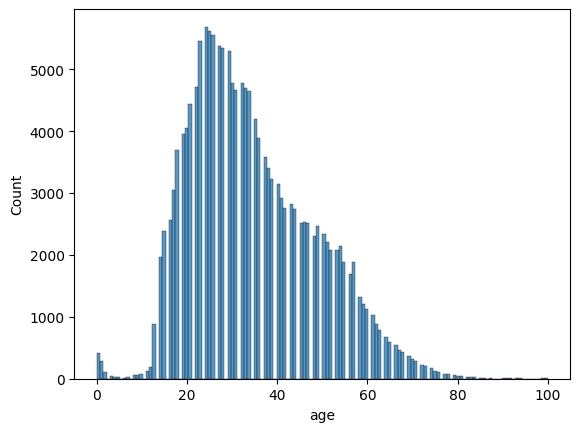

In [45]:
sns.histplot(users_df,x='age',binrange=(0,100))

In [46]:
users_df.loc[(users_df.age>100) | (users_df.age<5),'age'] = np.NaN
users_df.age.fillna(round(users_df.age.mean())).astype(int)

0         35
1         18
2         35
3         17
4         35
          ..
278853    35
278854    50
278855    35
278856    35
278857    35
Name: age, Length: 278858, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

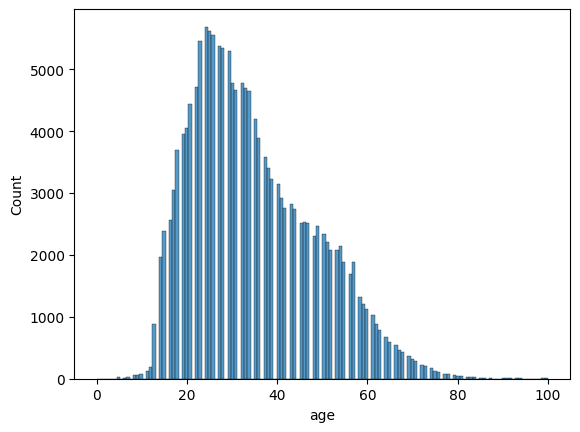

In [47]:
sns.histplot(users_df,x='age',binrange=(0,100))

In [48]:
print(sorted(ratings_df.book_rating.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [49]:
# ratings_df should have ratings only for the books in the books_df

ratings_df_new = ratings_df[ratings_df.isbn.isin(books_df.isbn)]

In [50]:
ratings_df_new.shape

(1031136, 3)

In [51]:
users_df.shape

(278858, 3)

In [52]:
# similarly, ratings_df should have only the users that are in our users_df dataset

ratings_df = ratings_df[ratings_df.user_id.isin(users_df.user_id)]

In [53]:
print(ratings_df.shape)

(1149780, 3)


In [54]:
# lets go with ratings_df_new because there aren't any new books and we filtered based on the ratings for the existing books above

In [55]:
ratings_df_explicit = ratings_df[ratings_df['book_rating'] != 0]
ratings_df_implicit = ratings_df[ratings_df['book_rating'] == 0]

In [56]:
ratings_df_explicit.head()
print(ratings_df_explicit.shape)

(433671, 3)


In [57]:
ratings_df_implicit.head()
print(ratings_df_implicit.shape)

(716109, 3)


In [58]:
df = books_df

In [59]:
from google.colab import drive
drive.mount('/content/drive')

books_df.to_csv('/content/drive/My Drive/Recommender System End-to-End/books_dataset.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
ratings_df_new.to_csv('/content/drive/My Drive/Recommender System End-to-End/ratings_dataset.csv', index=False)

In [61]:
users_df.to_csv('/content/drive/My Drive/Recommender System End-to-End/users_dataset.csv', index=False)